# Project description

Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. We'll be working with financial lending data from [Lending Club](https://www.lendingclub.com/). Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. You can read more about their marketplace [here](https://www.lendingclub.com/company/about-us?).

Each borrower completes a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data and their own data science process to assign an interest rate to the borrower. The interest rate is the percent in addition to the requested loan amount the borrower has to pay back. You can read more about the interest rate that Lending Club assigns [here](https://www.lendingclub.com/loans/personal-loans/rates-fees). Lending Club also tries to verify all the information the borrower provides but it can't verify all of the information (usually for regulation reasons).

A higher interest rate means that the borrower is a risk and more unlikely to pay back the loan. While a lower interest rate means that the borrower has a good credit history and is more likely to pay back the loan. The interest rates range from 5.32% all the way to 30.99% and each borrower is given a [grade](https://www.lendingclub.com/investing/investor-education/interest-rates-and-fees) according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the [origination](https://help.lendingclub.com/hc/en-us/articles/214463677) fee that Lending Club charges.

The borrower will make monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time and some borrowers default on the loan.

While Lending Club has to be extremely savvy and rigorous with their credit modelling, investors on Lending Club need to be equally as savvy about determining which loans are more likely to be paid off. At first, you may wonder why investors put money into anything but low interest loans. The incentive investors have to back higher interest loans is, well, the higher interest! If investors believe the borrower can pay back the loan, even if he or she has a weak financial history, then investors can make more money through the larger additional amount the borrower has to pay.

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. In this project, we'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time. To do that, we'll need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.


Lending Club releases data for all of the approved and declined loan applications periodically on their [Website](https://www.lendingclub.com/investing/peer-to-peer).

In this project, we'll focus on approved loans data from 2007 to 2011, since a good number of the loans have already finished. You'll find the dataset in 'data/loans_2007.csv'.

You'll also find a [data dictionary](data/LCDataDictionary.xlsx) (in XLS format) which contains information on the different column names.


# Problem Statement

We would like to build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not.

# Instructions

1. Read and explore the dataset.
2. Perform data cleaning tasks that are useful to model our problem.
3. Define what features we want to use and which column represents the target column we want to predict. 
4. Perform necessary data preparation to start training machine learning models.
5. 
    a. Make predictions about whether or not a loan will be paid off on time.

    b. Our objective is to fund enough loans that are paid off on time to offset our losses from loans that aren't paid
    off. An error metric will help us determine if our algorithm will make us money or lose us money. Select an error metric that will help us figure out when our model is performing well, and when it's performing poorly.
7. Evaluate your model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.regularizers import l2
import seaborn as sns
%matplotlib inline


In [2]:
loans = pd.read_csv("data/loans_2007.csv", low_memory=False) 
loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 471701350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Find list of columns which has more than 50% of data missing. 
### This columns/Variables will be droped from our analysis and can't be based on in prediction

In [3]:
def findmissingvalues(df):
    
    percent = df.isnull().sum() * 100 / len(df)
    missing_values = pd.DataFrame({'column_name': df.columns,'percent_missing': percent})

    return missing_values

findmissingvalues(loans)

,column_name,percent_missing
id,id,0.000000
member_id,member_id,0.007053
loan_amnt,loan_amnt,0.007053
funded_amnt,funded_amnt,0.007053
funded_amnt_inv,funded_amnt_inv,0.007053
term,term,0.007053
int_rate,int_rate,0.007053
installment,installment,0.007053
grade,grade,0.007053
sub_grade,sub_grade,0.007053


# Missing values bar plot
### From the below plot we visualize how many missing datapoints in each variable and we decide on what to do

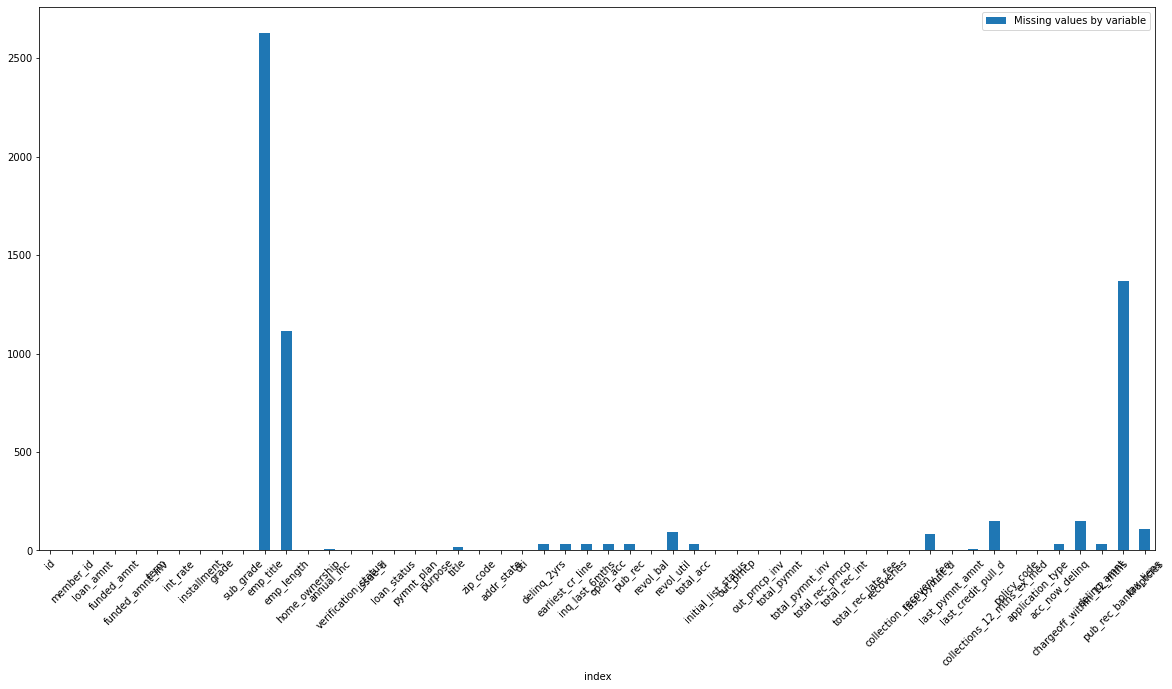

In [4]:
plt.rcParams["figure.figsize"] = (20,10)
loans.isna().sum().reset_index(name="Missing values by variable").plot.bar(x='index', y='Missing values by variable', rot=45)
plt.show()

In [5]:
# Since we have very few missing values, we wil drop them by row.
clean_loans = loans.dropna()

# Checking if all missing values are removed 

In [6]:
findmissingvalues(clean_loans)

,column_name,percent_missing
id,id,0.0
member_id,member_id,0.0
loan_amnt,loan_amnt,0.0
funded_amnt,funded_amnt,0.0
funded_amnt_inv,funded_amnt_inv,0.0
term,term,0.0
int_rate,int_rate,0.0
installment,installment,0.0
grade,grade,0.0
sub_grade,sub_grade,0.0


# Looking at the loan status which is our target column.
### we see that we have 6 different status, namely "Fully Paid" , "Charged Off" , "Current" , "Late (31-120 days)" , "In Grace Period" ,  and  "Late (16-30 days)" . 

In [7]:
clean_loans['loan_status'].value_counts()

Fully Paid                                             30599
Charged Off                                             4949
Does not meet the credit policy. Status:Fully Paid      1446
Current                                                  897
Does not meet the credit policy. Status:Charged Off      495
Late (31-120 days)                                        22
In Grace Period                                           16
Late (16-30 days)                                          7
Default                                                    2
Name: loan_status, dtype: int64

## As we are to classify whether the client will pay the loan or not,  we should not consider those datapoints of "current loans" in loan_status column and remain with those "Fully Paid", "Charged Off" and "Late", Which means that they will be 3 classes.

#### Having three classes will make our task a multi-class classification,  here, those who were late by some days or months, or in grace period will all be put in the same class called "Late"

In [8]:
#droping some unwanted rows
current = clean_loans.loc[clean_loans['loan_status'] == "Current"]
default = clean_loans.loc[clean_loans['loan_status'] == "Default"]
clean_loan_status = clean_loans.drop(current.index)
clean_loan_status = clean_loan_status.drop(default.index)

#Grouping in classes
clean_loan_status['loan_status'] = clean_loan_status['loan_status'].str.replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
clean_loan_status['loan_status'] = clean_loan_status['loan_status'].str.replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')
clean_loan_status['loan_status'] = clean_loan_status['loan_status'].str.replace('Late (31-120 days)', 'Late')
clean_loan_status['loan_status'] = clean_loan_status['loan_status'].str.replace('Late (16-30 days)', 'Late')
clean_loan_status['loan_status'] = clean_loan_status['loan_status'].str.replace('In Grace Period', 'Late')
clean_loan_status['loan_status'].replace({"Late (31-120 days)": "Late", "Late (16-30 days)": "Late"}, inplace=True)

clean_loan_status['loan_status'].value_counts()

Fully Paid     32045
Charged Off     5444
Late              45
Name: loan_status, dtype: int64

## Removing strings from certain columns

In [9]:
clean_loan_status['term'] = clean_loan_status['term'].str.replace('months', '')
clean_loan_status['int_rate'] = clean_loan_status['int_rate'].str.replace('%', '')

# Selecting certain columns that might be important in prediction

In [10]:
clean_loan_status['loan_amnt'] = clean_loan_status['loan_amnt'].astype(float)
clean_loan_status['funded_amnt_inv'] = clean_loan_status['funded_amnt_inv'].astype(float)
clean_loan_status['term'] = clean_loan_status['term'].astype(float)
clean_loan_status['int_rate'] = clean_loan_status['int_rate'].astype(float)
clean_loan_status['installment'] = clean_loan_status['installment'].astype(float)


data = clean_loan_status[['loan_amnt','funded_amnt_inv', 'term','int_rate','installment','grade', 'sub_grade','home_ownership', 'annual_inc','loan_status','purpose','inq_last_6mths','open_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int']]
data



,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,loan_status,purpose,inq_last_6mths,open_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
1,2500.0,2500.000000,60.0,15.27,59.83,C,C4,RENT,30000.0,Charged Off,car,5.0,3.0,1008.710000,1008.71,456.46,435.17
3,10000.0,10000.000000,36.0,13.49,339.31,C,C1,RENT,49200.0,Fully Paid,other,1.0,10.0,12231.890000,12231.89,10000.00,2214.92
5,5000.0,5000.000000,36.0,7.90,156.46,A,A4,RENT,36000.0,Fully Paid,wedding,3.0,9.0,5632.210000,5632.21,5000.00,632.21
6,7000.0,7000.000000,60.0,15.96,170.08,C,C5,RENT,47004.0,Fully Paid,debt_consolidation,1.0,7.0,10137.840008,10137.84,7000.00,3137.84
7,3000.0,3000.000000,36.0,18.64,109.43,E,E1,RENT,48000.0,Fully Paid,car,2.0,4.0,3939.135294,3939.14,3000.00,939.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42313,10000.0,149.994976,36.0,10.91,326.97,C,C3,RENT,75000.0,Charged Off,debt_consolidation,8.0,7.0,5642.350000,83.89,2717.29,1074.30
42369,10475.0,3174.995847,36.0,17.54,376.29,G,G4,RENT,31000.0,Charged Off,debt_consolidation,4.0,7.0,1878.900000,568.40,1147.44,731.46
42370,10475.0,2925.000000,36.0,14.38,359.95,E,E4,MORTGAGE,58000.0,Fully Paid,debt_consolidation,12.0,11.0,11185.338154,3123.35,10475.00,710.34
42371,20425.0,1849.998917,36.0,15.96,298.67,F,F4,RENT,29000.0,Charged Off,debt_consolidation,8.0,10.0,2981.700000,647.10,1968.03,1013.67


In [11]:
df_dummies = pd.get_dummies(data, columns=['grade','sub_grade','home_ownership','purpose'])
df_dummies

,loan_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,inq_last_6mths,open_acc,total_pymnt,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
1,2500.0,2500.000000,60.0,15.27,59.83,30000.0,Charged Off,5.0,3.0,1008.710000,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.000000,36.0,13.49,339.31,49200.0,Fully Paid,1.0,10.0,12231.890000,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,5000.000000,36.0,7.90,156.46,36000.0,Fully Paid,3.0,9.0,5632.210000,...,0,0,0,0,0,0,0,0,0,1
6,7000.0,7000.000000,60.0,15.96,170.08,47004.0,Fully Paid,1.0,7.0,10137.840008,...,0,0,0,0,0,0,0,0,0,0
7,3000.0,3000.000000,36.0,18.64,109.43,48000.0,Fully Paid,2.0,4.0,3939.135294,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42313,10000.0,149.994976,36.0,10.91,326.97,75000.0,Charged Off,8.0,7.0,5642.350000,...,0,0,0,0,0,0,0,0,0,0
42369,10475.0,3174.995847,36.0,17.54,376.29,31000.0,Charged Off,4.0,7.0,1878.900000,...,0,0,0,0,0,0,0,0,0,0
42370,10475.0,2925.000000,36.0,14.38,359.95,58000.0,Fully Paid,12.0,11.0,11185.338154,...,0,0,0,0,0,0,0,0,0,0
42371,20425.0,1849.998917,36.0,15.96,298.67,29000.0,Charged Off,8.0,10.0,2981.700000,...,0,0,0,0,0,0,0,0,0,0


# Check if there is no multicolineality, or high intercorrelations among two or more independent variables.

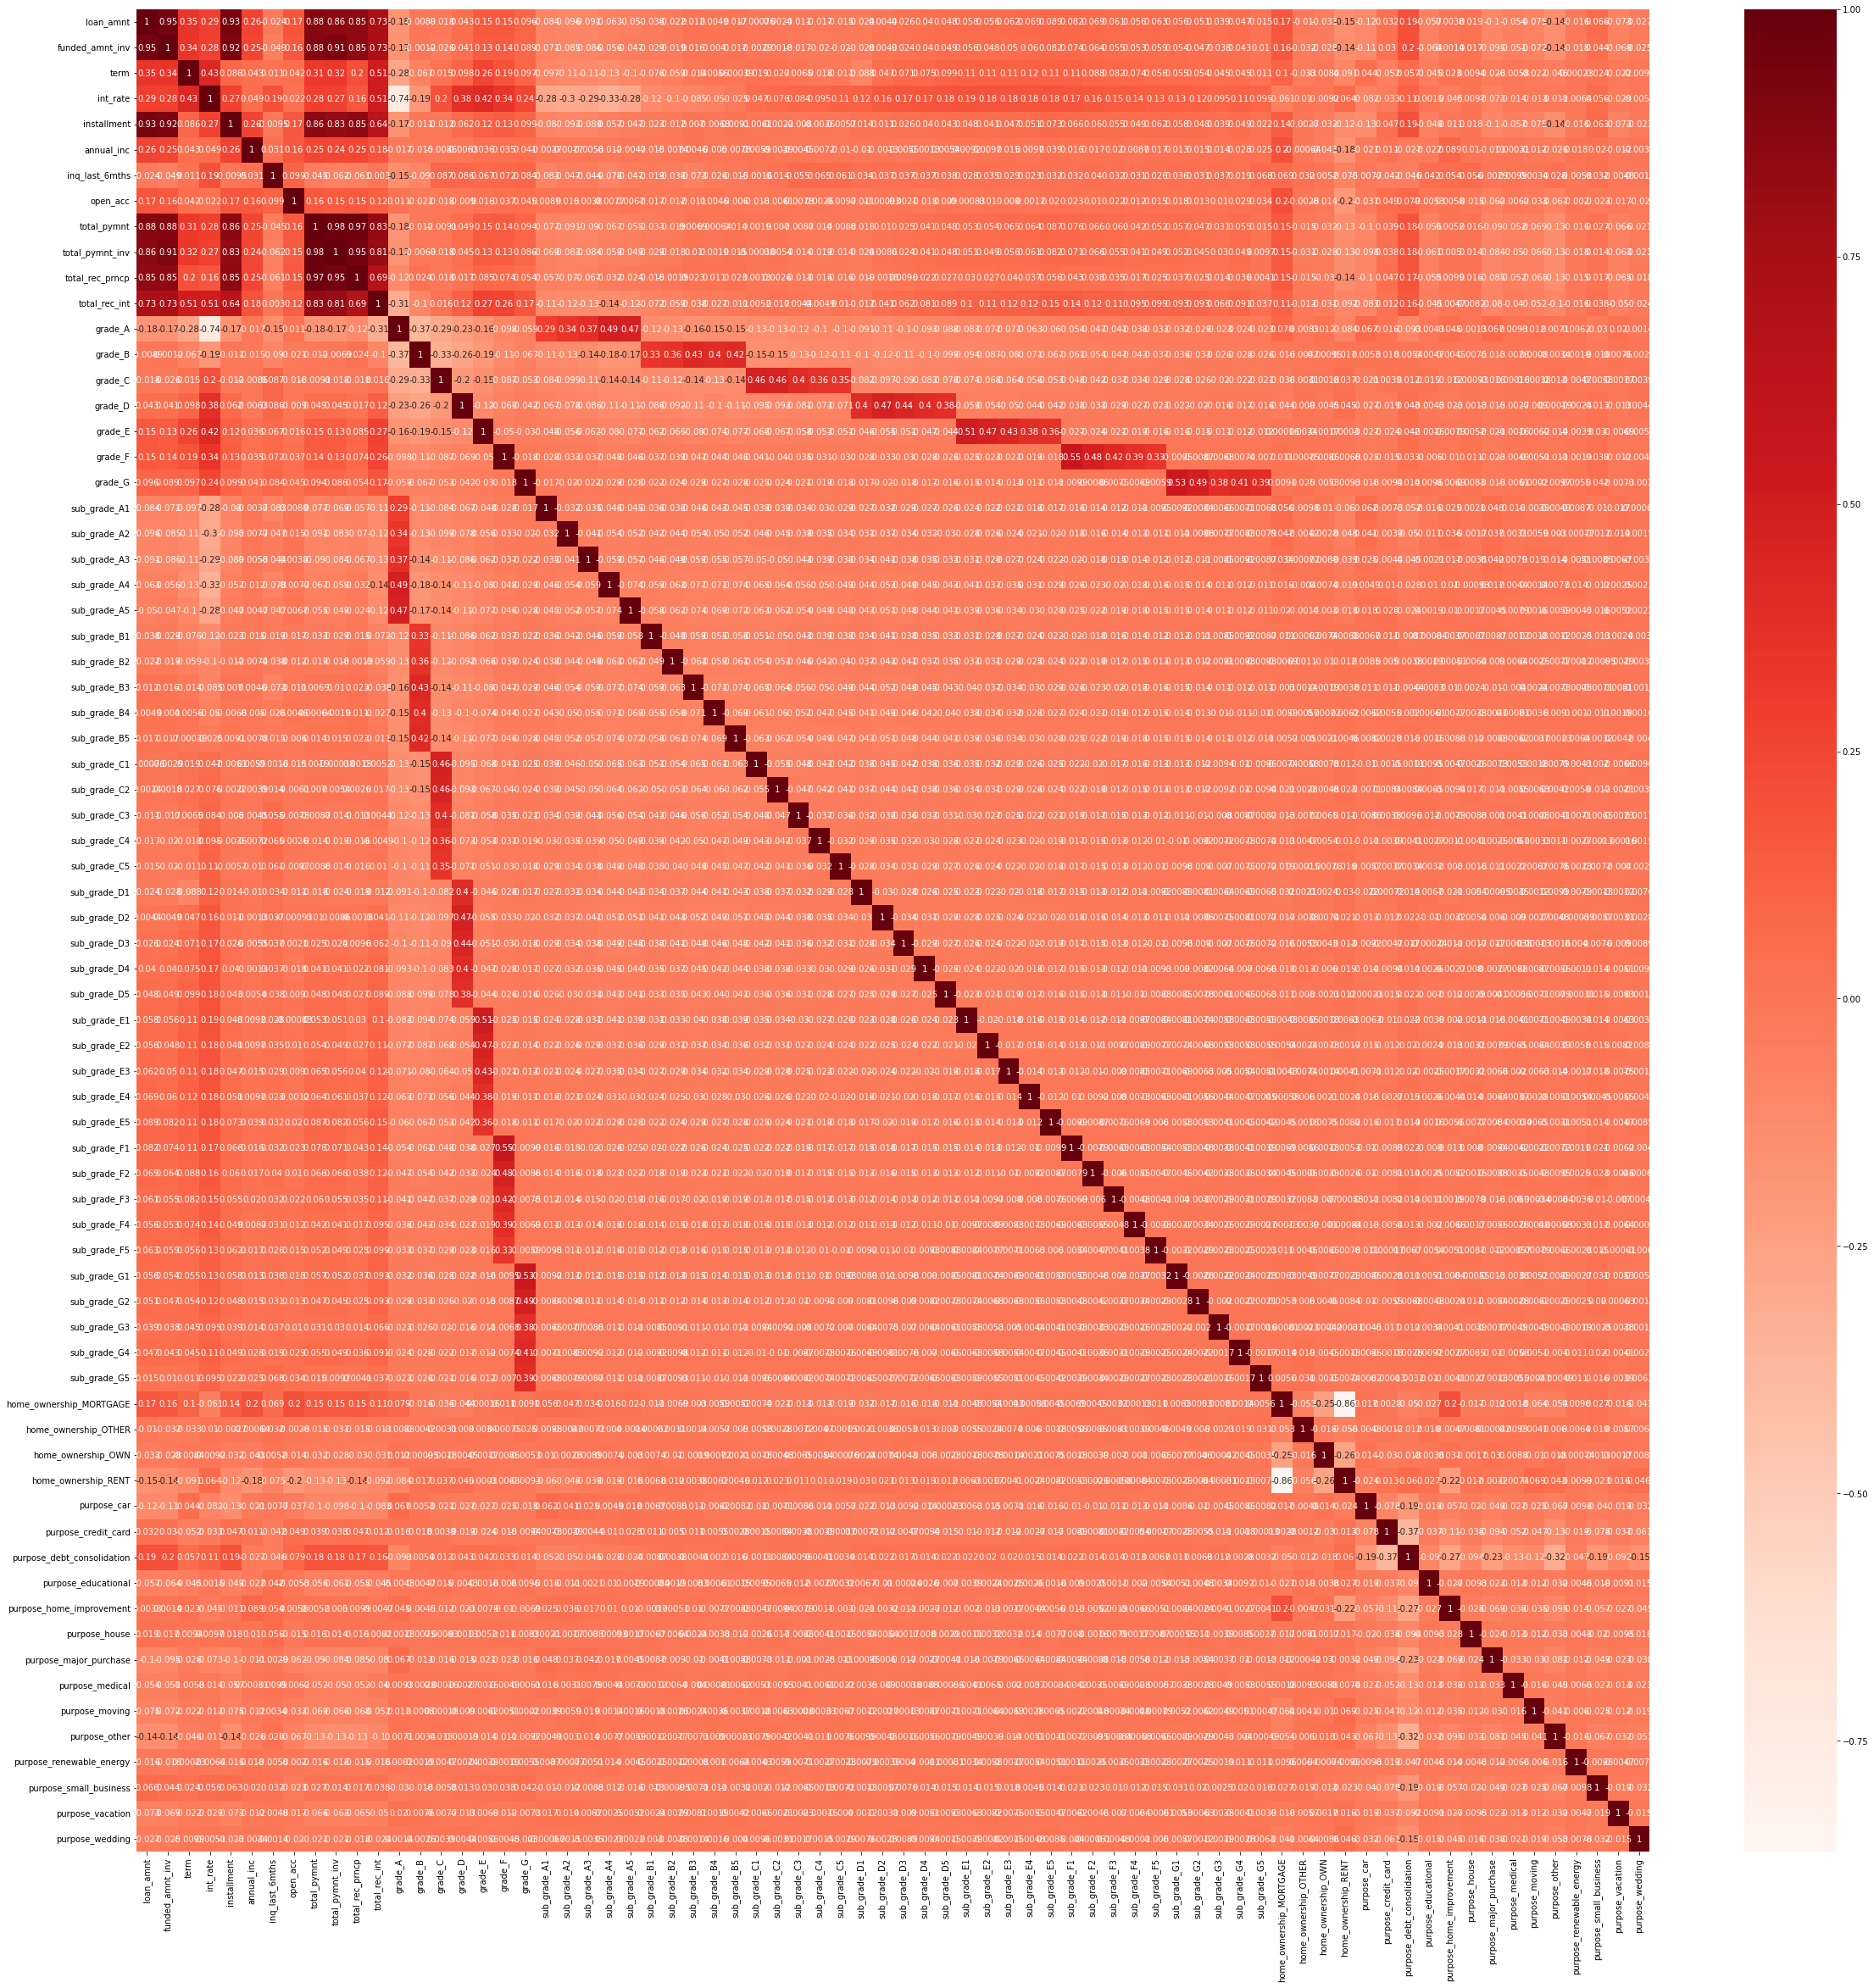

In [12]:
plt.figure(figsize=(40,40))
cor = df_dummies.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Here we make sure not to use correlated variables, and that is why we have to choose variables accordingly

In [13]:
df_dummies['loan_status'] = df_dummies['loan_status'].map({'Fully Paid': 0, 'Charged Off': 2, 'Late': 1,})
df_dummies

,loan_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,inq_last_6mths,open_acc,total_pymnt,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
1,2500.0,2500.000000,60.0,15.27,59.83,30000.0,2,5.0,3.0,1008.710000,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,10000.000000,36.0,13.49,339.31,49200.0,0,1.0,10.0,12231.890000,...,0,0,0,0,0,1,0,0,0,0
5,5000.0,5000.000000,36.0,7.90,156.46,36000.0,0,3.0,9.0,5632.210000,...,0,0,0,0,0,0,0,0,0,1
6,7000.0,7000.000000,60.0,15.96,170.08,47004.0,0,1.0,7.0,10137.840008,...,0,0,0,0,0,0,0,0,0,0
7,3000.0,3000.000000,36.0,18.64,109.43,48000.0,0,2.0,4.0,3939.135294,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42313,10000.0,149.994976,36.0,10.91,326.97,75000.0,2,8.0,7.0,5642.350000,...,0,0,0,0,0,0,0,0,0,0
42369,10475.0,3174.995847,36.0,17.54,376.29,31000.0,2,4.0,7.0,1878.900000,...,0,0,0,0,0,0,0,0,0,0
42370,10475.0,2925.000000,36.0,14.38,359.95,58000.0,0,12.0,11.0,11185.338154,...,0,0,0,0,0,0,0,0,0,0
42371,20425.0,1849.998917,36.0,15.96,298.67,29000.0,2,8.0,10.0,2981.700000,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# df_dummies.to_csv("data.csv")

In [15]:
X = df_dummies[["loan_amnt","term","int_rate","installment","annual_inc","inq_last_6mths","open_acc","total_pymnt"]]
y = df_dummies['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)
print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))

The number of training samples: 30027
The number of testing samples: 7507


# Building Decision tree Algorithm

#### Source: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [16]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9512455041960837


# Using Gradient Boosting Classifier
#### Source: https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] # learning lates

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=3, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.868
Accuracy score (validation): 0.875
Learning rate:  0.075
Accuracy score (training): 0.882
Accuracy score (validation): 0.887
Learning rate:  0.1
Accuracy score (training): 0.896
Accuracy score (validation): 0.900
Learning rate:  0.25
Accuracy score (training): 0.928
Accuracy score (validation): 0.930
Learning rate:  0.5
Accuracy score (training): 0.946
Accuracy score (validation): 0.945
Learning rate:  0.75
Accuracy score (training): 0.953
Accuracy score (validation): 0.952
Learning rate:  1
Accuracy score (training): 0.946
Accuracy score (validation): 0.946


In [20]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=3, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[7734    6    9]
 [  13    0    0]
 [ 463    0  784]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7749
           1       0.00      0.00      0.00        13
           2       0.99      0.63      0.77      1247

    accuracy                           0.95      9009
   macro avg       0.64      0.54      0.58      9009
weighted avg       0.95      0.95      0.94      9009



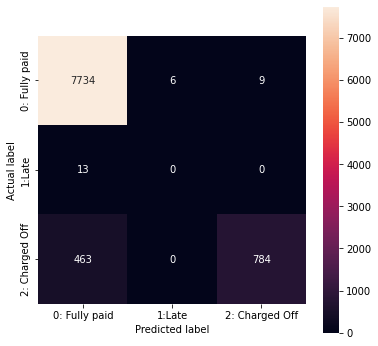

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, predictions)

# Plotting confusion matrix 

plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0: Fully paid', '1:Late', '2: Charged Off'],
                        yticklabels=['0: Fully paid', '1:Late', '2: Charged Off'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

#  Using Support Vector machine

#### Source: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [22]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9491141601172239


# Naive bayes Classifier

In [24]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 66.31144265352337


## From the above used models we can see that some models are accurate above 90% which is realy good, but considering that our dataset is imbalanced/biased we can't be too confident about this accuracy.


Fully Paid  :   32045    : 85.37%                                                                                      
Charged Off :    5444    : 14.50%                                                                                    
Late :     45      :  0.12%

Total: 37534    : 100%


Since we sampled randomly for the training and testing, the ratio is still 85, 14, 0.12 in the testing set. If Our model is very biased , and predicts all the samples to be class "Fully Paid" , then: Overall accuracy = 85% and above.  

While Average accuracy might be = 60 % ( 100% for class "Fully Paid" + 50% for class "Charged Off" + 30% for class "Late") / 3

The overall accuracy is really high but it does not reflect the actual quality of the model. The average accuracy gives us a better indication of the quality

## To reduce this Imbalance we are going to take, only those with "Charged of" and some "Fully paid" and also make sure the dataset is balanced

#### Source: https://towardsdatascience.com/how-to-handle-imbalance-data-and-small-training-sets-in-ml-989f8053531d

In [25]:
from sklearn.utils import resample


In [26]:
# Separate majority and minority classes
df_majority = df_dummies[df_dummies.iloc[:,6]==2]
df_minority = df_dummies[df_dummies.iloc[:,6]==0]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=5000)
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=5000)
# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])


In [27]:
df_up_down_sampled

,loan_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,inq_last_6mths,open_acc,total_pymnt,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
38375,6500.0,3375.003441,36.0,11.78,215.22,91200.0,2,2.0,4.0,3864.060000,...,1,0,0,0,0,0,0,0,0,0
36866,2500.0,2425.000000,36.0,15.68,87.51,32108.0,2,1.0,6.0,791.520000,...,0,0,0,0,0,0,0,0,0,0
37933,9000.0,5674.261656,36.0,9.63,288.85,110000.0,2,1.0,14.0,1843.270000,...,0,0,0,0,0,0,0,0,0,0
12935,14300.0,14300.000000,60.0,21.36,389.77,41766.4,2,1.0,7.0,5724.810000,...,0,0,0,0,0,0,0,0,0,0
41631,6400.0,0.000000,36.0,11.34,210.56,42000.0,2,6.0,7.0,491.790000,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,14000.0,14000.000000,36.0,12.42,467.82,88000.0,0,1.0,11.0,16841.250007,...,0,0,0,0,0,0,0,0,0,0
14700,2000.0,2000.000000,36.0,12.99,67.38,17280.0,0,0.0,3.0,2423.448993,...,0,0,1,0,0,0,0,0,0,0
4695,16000.0,15950.000000,60.0,20.89,431.87,94000.0,0,0.0,3.0,23491.922531,...,0,0,0,0,0,0,0,0,0,0
12015,3000.0,3000.000000,60.0,11.99,66.72,64800.0,0,2.0,4.0,3030.000000,...,0,0,0,0,0,0,0,0,0,0


# Now that our data is Resampled and balanced with only two classes,i.e: "Charged_Off : 2" and "Fully_Paid : 2"

In [28]:
X = df_up_down_sampled[["loan_amnt","term","int_rate","installment","annual_inc","inq_last_6mths","open_acc","total_pymnt"]]
y = df_up_down_sampled['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)
print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))

The number of training samples: 8000
The number of testing samples: 2000


# Decision Tree Algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [30]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.913


# Using Gradient Boosting classifier

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

state = 12  
test_size = 0.30  
  
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
#     test_size=test_size, random_state=state)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1] # learning lates

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=3, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.787
Accuracy score (validation): 0.790
Learning rate:  0.075
Accuracy score (training): 0.810
Accuracy score (validation): 0.818
Learning rate:  0.1
Accuracy score (training): 0.812
Accuracy score (validation): 0.817
Learning rate:  0.25
Accuracy score (training): 0.859
Accuracy score (validation): 0.875
Learning rate:  0.5
Accuracy score (training): 0.892
Accuracy score (validation): 0.848
Learning rate:  0.75
Accuracy score (training): 0.897
Accuracy score (validation): 0.910
Learning rate:  1
Accuracy score (training): 0.909
Accuracy score (validation): 0.842


In [32]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=3, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[909  79]
 [130 882]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       988
           2       0.92      0.87      0.89      1012

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



# Visualizing the ROC Curve for the gradient boosting model

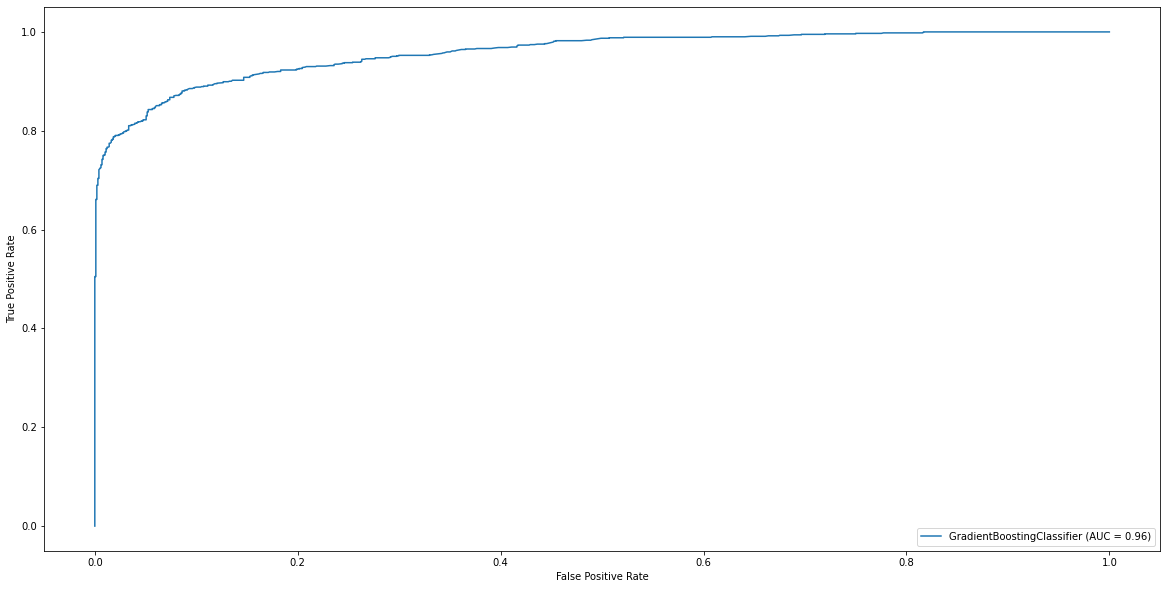

In [33]:
from sklearn import datasets, metrics, model_selection, svm

metrics.plot_roc_curve(gb_clf2, X_test, y_test) 
plt.show()

Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. from the above we can see the gradient boosting model can distinguishing between the "Charged Off" and "Fully Paid" classes at a rate of 96% which is good.

# Feature importance evaluation

#### Source: https://vitalflux.com/gradient-boosting-regression-python-examples/

In [34]:
# df_up_down_sampled = pd.DataFrame(df_up_down_sampled,columns=df_up_down_sampled.feature_names)
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#

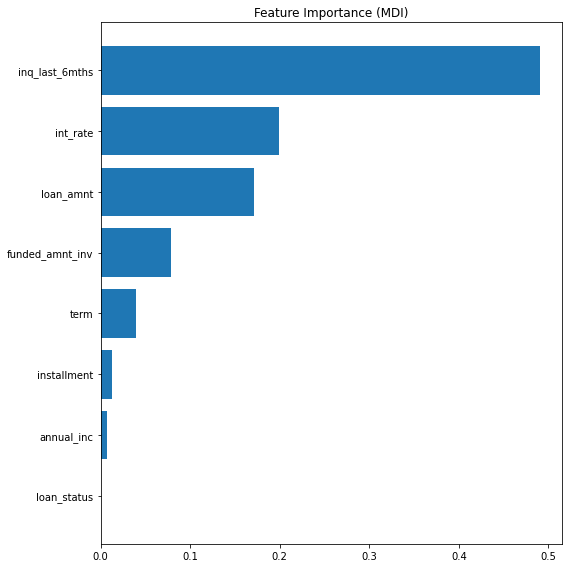

In [35]:
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(df_up_down_sampled.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gb_clf, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

# Conclusion

As conclusion, we have seen that our dataset was imbalanced which red to high accuracy but very biased. after balancing the dataset the accuracy was 89% for the two models used, which is Gradient boosting and Decision Tree.

Looking at the feature importance in we saw that "The number of inquiries in past 6 months (excluding auto and mortgage inquiries)" was a very important factor to whether or not clients pays off or fail to pay. it was followed by "Interest rate", "The total amount committed to that loan at that point in time" , "Loan amount" and "The number of payments on the loan. Values are in months and can be either 36 or 60"

This findings show that A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

We recommend the use of Gradient boosting algorithm for evaluating clients potential before granting them loans from the lending club.